In this notebook , we will analyze Boston house data using seaborn and statistics

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

Analyze Sale Price by describe  

In [3]:
print(df_train['SalePrice'].describe())
range = df_train['SalePrice'].max() - df_train['SalePrice'].min()
print('--------------------------------------')
print('Sale Price range is : {}'.format(range))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
--------------------------------------
Sale Price range is : 720100


Let's see the distribution of Sale price 

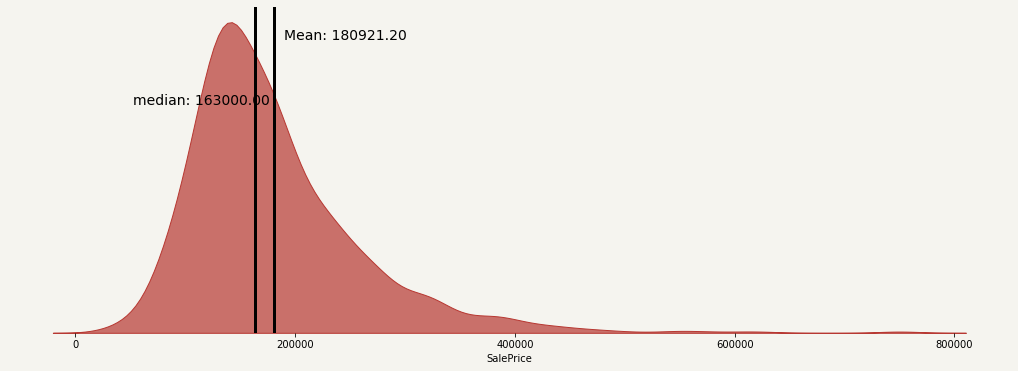

In [4]:
background_color = '#F5F4EF'
fig, ax = plt.subplots(1,1, figsize=(18,6), facecolor=background_color)
ax.set_facecolor(background_color)
#sns.kdeplot(data=df, x=df['GarageArea'],shade=True,color='#B73832',alpha=0.9, ax=ax)
sns.kdeplot(data=df_train, x=df_train['SalePrice'], shade=True, color='#B73832',alpha=0.7, ax=ax)


plt.axvline(df_train['SalePrice'].mean(), color='black', linewidth=3 , alpha = 1)
plt.axvline(df_train['SalePrice'].median(), color='black', linewidth=3)


for s in ['top','left', 'bottom', 'right']:
    ax.spines[s].set_visible(False)

min_ylim, max_ylim = plt.ylim()
plt.text(df_train['SalePrice'].mean()*1.05, max_ylim*0.9, 'Mean: {:.2f}'.format(df_train['SalePrice'].mean()) , fontsize= 14)
plt.text(df_train['SalePrice'].median()*0.32, max_ylim*0.7, 'median: {:.2f}'.format(df_train['SalePrice'].median()) , fontsize= 14)

ax.get_yaxis().set_visible(False)

As you can see , mean greater than median 
The distribution of this data appears to be right skewed

# Empirical Cumulative distribution Function (ECDF)

If we went to know how many houses have SalePrice less than or equal 200,000

In statistical there is Empirical Cumulative distribution Function or ECDF 

Let's explain this statistical concept and use it in our data

### What is ECDF ? 

The empirical CDF is a step function that asymptotically approaches 0 and 1 on the vertical Y-axis. It’s empirical because it represents your observed values and the corresponding data percentiles

In [5]:
  def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y
  

Text(0, 0.5, 'Empirical Cumulative distribution Function (ECDF)')

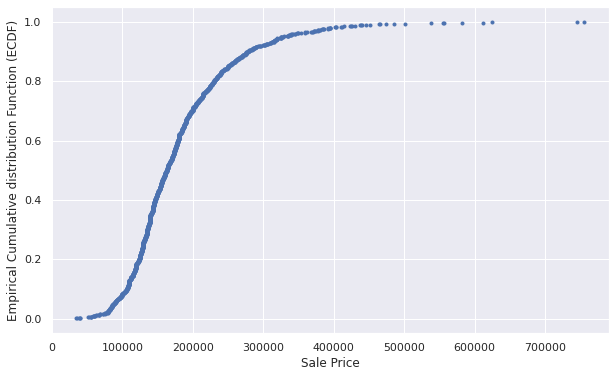

In [6]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
x_price , y_price = ecdf(df_train['SalePrice'])
plt.plot(x_price , y_price , marker = '.' , linestyle = 'none')
plt.xlabel('Sale Price')
plt.ylabel('Empirical Cumulative distribution Function (ECDF)')

20% of homes are priced less than 200.000

And about 94-95% of homes are priced equal 300.000

As you know that the world in 2008 witnessed an economic crisis due to the real estate market in America. Did this crisis affect house prices in 2008 compared to house prices before 2008 and after 2008?

Let's make sure of that

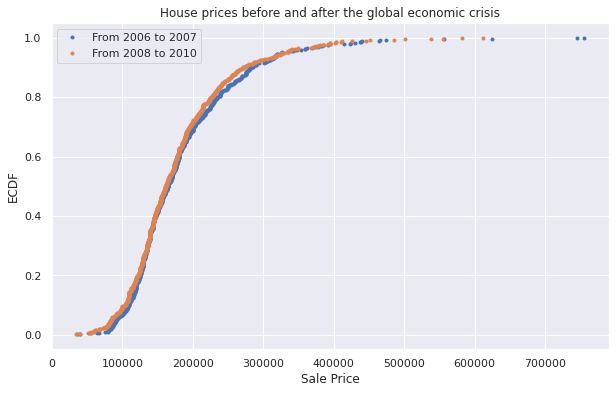

In [7]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))

Before_2008 = df_train[df_train['YrSold'] < 2008]
After_2008 = df_train[df_train['YrSold'] >= 2008]


x_Before_2008, y_Before_2008 = ecdf(Before_2008['SalePrice'])
x_After_2008, y_After_2008 = ecdf(After_2008['SalePrice'])

# Generate plot
plt.plot(x_Before_2008, y_Before_2008, marker='.', linestyle='none' , label = 'From 2006 to 2007')
plt.plot(x_After_2008, y_After_2008, marker='.', linestyle='none' , label = 'From 2008 to 2010')
# Label the axes

plt.title('House prices before and after the global economic crisis')
plt.xlabel('Sale Price')
plt.ylabel('ECDF')
plt.legend()
# Display the plot
plt.show()

There was no significant impact. We can almost say that there was no effect at all, but we can note from this plot that the prices from 2008 and beyond have decreased from previous years.

# Some advice for you

Let's follow a story to answer some questions about this data
If one of us wanted to buy a house, what would he want to be in this house?

For example :

1- Type of residential area ?

2 - Type of exterior coverage for the house 

3 - The electrical system of the house ?

4- Type of heating in the house ?

5- The foundation on which the house was built ?

6- The number of bedrooms in the house ?

These questions are not only specific to the person who wants to buy a house, but also these questions can give you some perceptions about what people are interested in at home in order to build a house that achieves most of what the buyer is looking for

I gave my project the name "House Prices in the eyes of Seaborne and Statistics."

So we will need Seaborne to answer these questions , Let's go 

### Q1: What is the residential area preferred by the buyer? 

You will see in the following figure that the largest number (around 1100 House) of homes that were sold was the residential area is a RL or low density area (people always tend to the quiet areas)

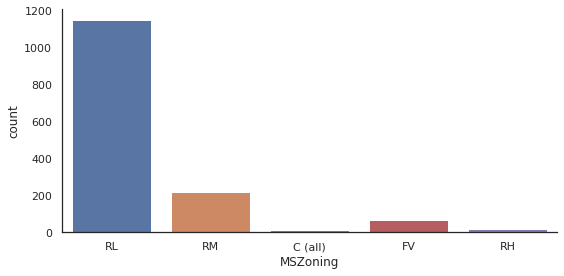

In [8]:
sns.set_style('white')
sns.catplot(x = 'MSZoning', data = df_train , kind = 'count' , height=4, aspect=2)

### Q2 : The buyer certainly cares about the exterior appearance of the house ?

Let's see what types of external coverage are the most exciting for the buyer

The type of external cover most attractive to buyers is VinylSd or Vinyl Siding

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'VinylSd'),
  Text(1, 0, 'MetalSd'),
  Text(2, 0, 'Wd Sdng'),
  Text(3, 0, 'HdBoard'),
  Text(4, 0, 'BrkFace'),
  Text(5, 0, 'WdShing'),
  Text(6, 0, 'CemntBd'),
  Text(7, 0, 'Plywood'),
  Text(8, 0, 'AsbShng'),
  Text(9, 0, 'Stucco'),
  Text(10, 0, 'BrkComm'),
  Text(11, 0, 'AsphShn'),
  Text(12, 0, 'Stone'),
  Text(13, 0, 'ImStucc'),
  Text(14, 0, 'CBlock')])

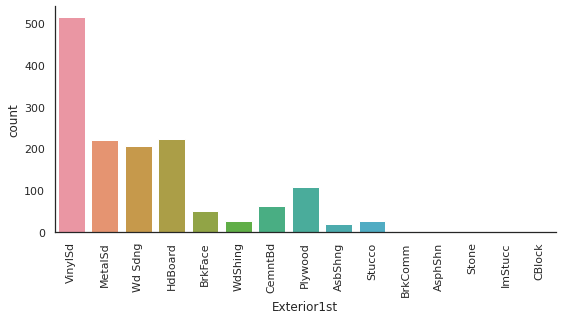

In [9]:
sns.catplot(x= 'Exterior1st' , kind= 'count', data = df_train , height=4, aspect=2)
plt.xticks(rotation=90)

### Q3 : so what is the most important system for buyers ?

The most common system in homes is SBrkr or Standard Circuit Breakers & Romex (around 1300 houses out of a total of 1460 houses)

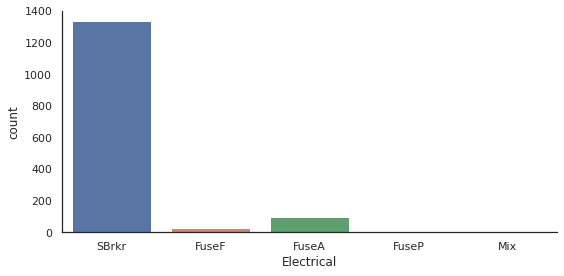

In [10]:
sns.catplot(x= 'Electrical' , kind= 'count', data = df_train , height=4, aspect=2)

### Q4:

The type of heating is one of the most important things for a buyer for winter

Let's find out the best type of heating

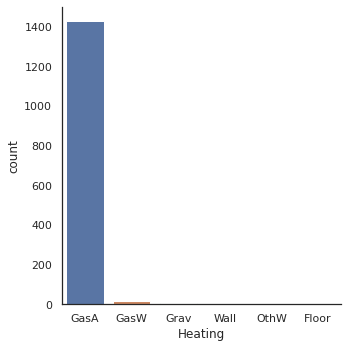

In [11]:
sns.catplot(x = 'Heating', data = df_train , kind = 'count')

Yes , The best system is GasA or Gas forced warm air furnace

### Q5: 

Now let's find out what kind of base it is

The most common building foundation is PConc or Poured Contrete	

But you can also notice that there is another type that is very close to the first type, which is CBlock or Cinder Block

If you assume that you will build a house to sell and you will make a decision based on this project, you can make the foundation of the house either PConc or CBlock 


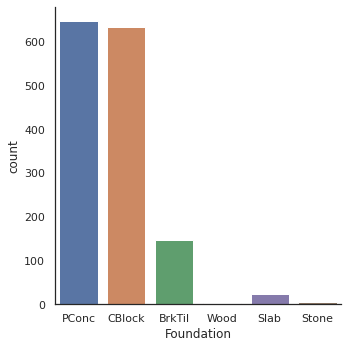

In [12]:
sns.catplot(x= 'Foundation' , kind= 'count', data = df_train)

### Q6 : Let's go to the answer to the last question, which is how many rooms do people care about ?

This time, we will show the number of homes that have been sold and contain n rooms from 2006 to 2010

Let's discover buyers' interests in the number of rooms in this period

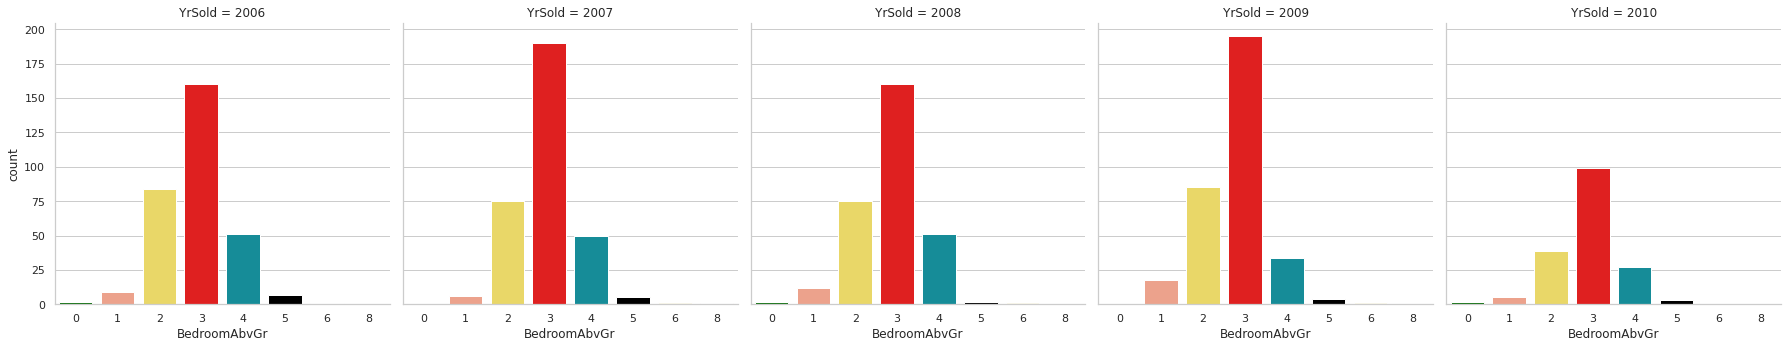

In [13]:
g_palette = ['green' , '#FC997C' , '#FFE652' , 'red' , '#009DAE' , 'black'  , '#FFFBE9' , '#FF8AAE']
sns.set_style('whitegrid')
sns.catplot(x= 'BedroomAbvGr' , kind= 'count', data = df_train , col = 'YrSold' , palette = g_palette)

As you can see from this plot, over the past 4 years, people have been very interested in the number of three rooms

And people's interests mostly ranged from two to four rooms

if We want to know what is the probability of finding a house with a certain number of rooms if we collection this data again or deal with population data based on sample data

We can use PMFs or Probability mass Function 

# What is probability mass function (PMF)

probability mass function (PMF) used to represent a distribution , which
maps from each value to its probability. A probability is a frequency expressed as a
fraction of the sample size, n. To get from frequencies to probabilities, we divide through
by n, which is called normalization

Before concatenate train and test data we will show the correction between variable

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

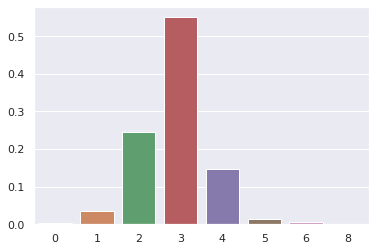

In [14]:
sns.set()
probabilities = df_train['BedroomAbvGr'].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

<AxesSubplot:>

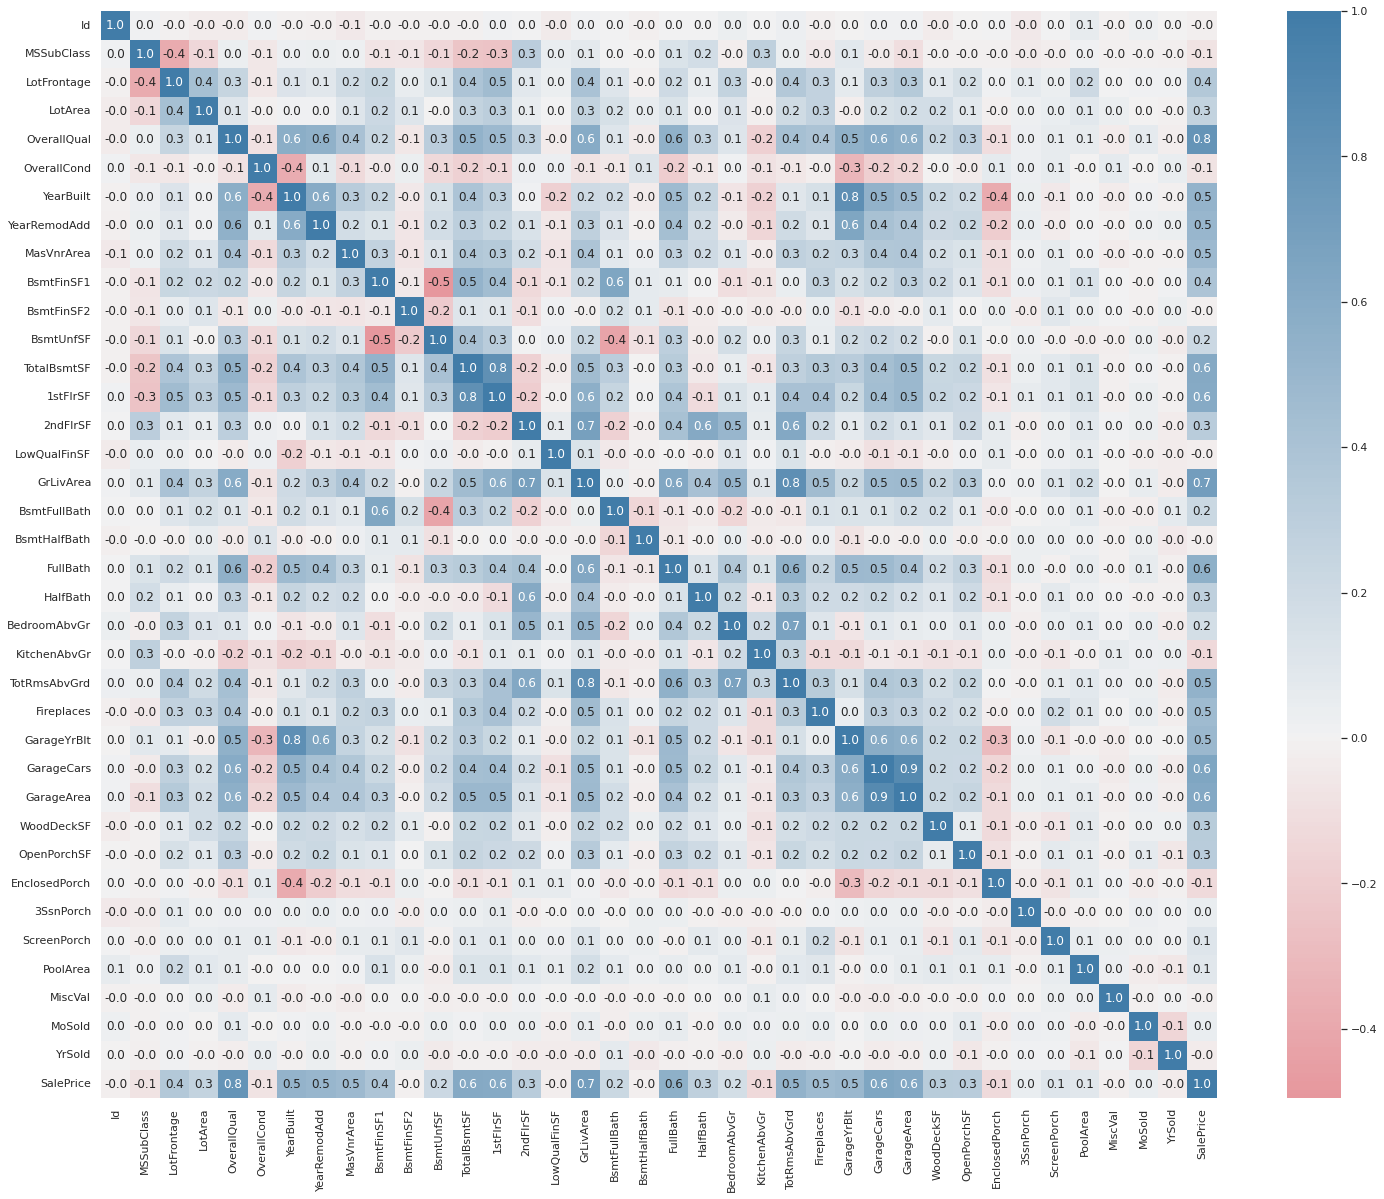

In [15]:
cmap = sns.diverging_palette(h_neg=10,h_pos=240 , as_cmap=True)
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr() ,center = 0 , cmap = cmap , annot= True ,  fmt='.1f')

# Concatenate dataset

In [16]:
y_train = df_train['SalePrice']
test_id = df_test['Id']
all_data = pd.concat([df_train, df_test], axis=0, sort=False)
all_data.shape

(2919, 81)

# Feature Engineering

In [17]:
all_data['Total Area'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.shape

(2919, 82)

In the previous , We used PMF to give probability to disceret variable (column) 

If we need to do the same thing with continuos variable ?

PMF cannot be defined for continuous variables

in this time we will use different concept

# Cumulative distribution function (CDF)

What is Cumulative distribution function ?

CDF is another method to describe the distribution of continuous variables. The advantage of the CDF is that it can be defined for any kind of variable (discrete, continuous, and mixed).



In [18]:
  def cdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

Text(0, 0.5, 'CDF')

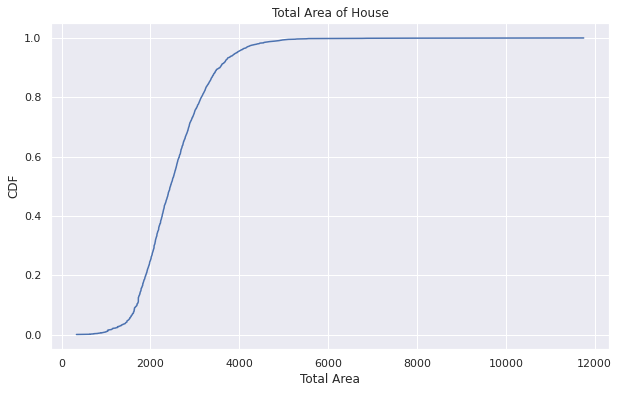

In [19]:
sns.set()
fig, ax = plt.subplots(figsize=(10,6))
x_area , y_area = cdf(all_data['Total Area'])
plt.plot(x_area , y_area)


plt.title('Total Area of House')
plt.xlabel('Total Area')
plt.ylabel('CDF')

If we collecting these data again , the probability of finding a house with an area 2000 square feet is 25% or less 

and the probability of finding a house with an area 3000 square feet is 75% or less 

Let's do this process again

Text(0, 0.5, 'CDF')

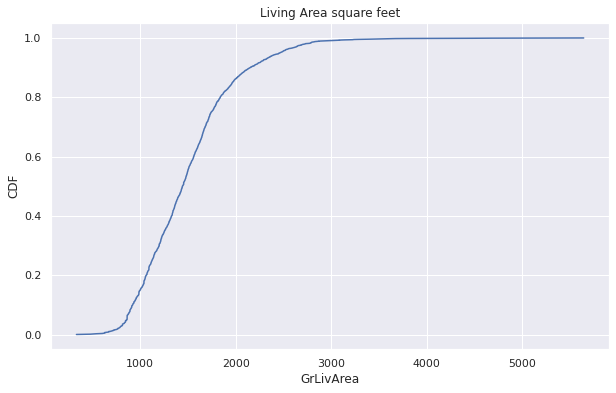

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

x_living , y_living = cdf(all_data['GrLivArea'])
plt.plot(x_living , y_living)

plt.title('Living Area square feet')
plt.xlabel('GrLivArea')
plt.ylabel('CDF')

There is an chance or probability to find a house with a living room area 1126 square feet is 25% or less

and also probability to find a house with a living room area (around 2000) square feet is 75% or less

Of course, this is not all, but we have analyzed some important features that we can use in the future to make a decision that will achieve a high success rate for us (in case you are interested in building and selling homes)

# Missing values
 
 Before we show the missing values in our data, we want to know a quick summary of the missing values (what they are, When and why they happen, and why they can cause some problems)
 
 Missing values : are where some of the observations in a data set are blank

 missing values, occur when you don’t have data stored for certain variables or participants. Data can go missing due to incomplete data entry, equipment malfunctions, lost files, and many other reasons.

Missing values are a problem because it adds ambiguity to your analysis. Assuming there are missing values in Bedroom column. What if you want to find out the average number of Bedroom ? With the second observation missing a data value, it would be impossible to accurately work it out.

Ok , We need to fix NAN and zero values
 
first we will show the number of NAN values in data and we will fix it 


In [21]:
total = all_data.isna().sum().sort_values(ascending = False)
percent = (total / all_data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(40)


,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageCond,159,0.054471


<AxesSubplot:>

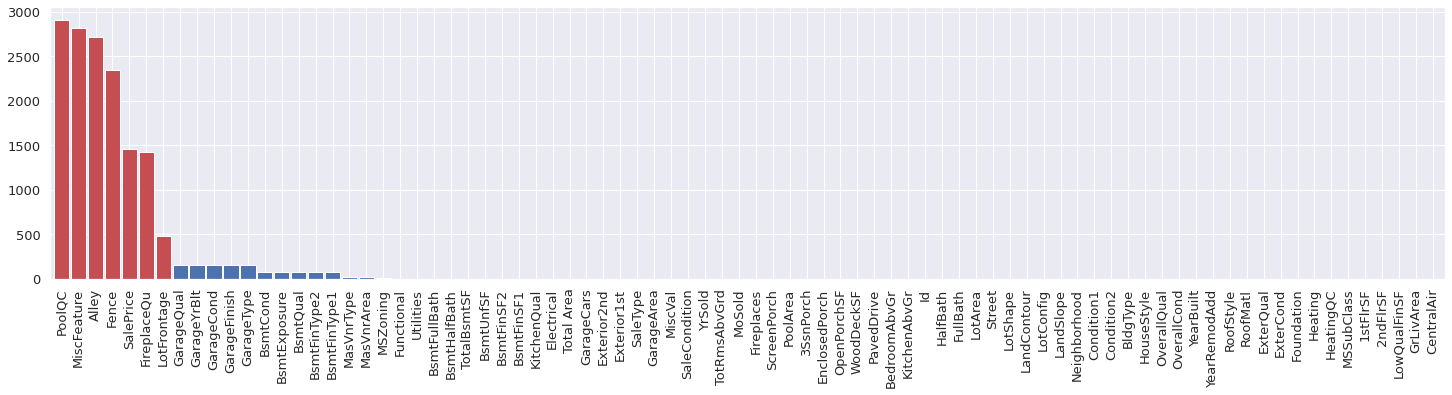

In [22]:
#Visualize missing value
color = ['b' if s <= 300 else 'r' for s in total]
total.plot(kind = 'bar' , fontsize = 13 , width=0.9 , color = color , figsize=(25 , 5))

In [23]:
all_data = all_data.drop( ["Id" , "Alley" , "FireplaceQu" , "PoolQC" ,"Fence" , "MiscFeature" , "LotFrontage" , 'SalePrice'] , axis = 1 , errors='ignore')
all_data.shape

(2919, 74)

In [24]:
categorical = ['GarageQual', 'GarageYrBlt','GarageCond','GarageFinish','GarageType','BsmtCond',
'BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1','MasVnrType','MasVnrArea',
'MSZoning','Functional','Utilities','BsmtFullBath','BsmtHalfBath','TotalBsmtSF',
'BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','KitchenQual','Electrical', 
'Total Area' , 'GarageCars' , 'Exterior2nd' , 'Exterior1st' , 'SaleType' , 'GarageArea']

for feature in categorical:
    all_data[feature] = all_data[feature].fillna(all_data[feature].mode()[0])

Second we will deal with zeros values and also fix it 

#### Note :

In some columns there are many zero values, but this does not mean that they are missing values or an error occurred in the measurement of this value, this value may indicate that this house does not contain this feature

For example, in fireplace column , there are some observation that do not contain fireplace, so a zero value is set for them

Therefore, you must be careful when dealing with these columns

In [25]:
sns.set_style('white')

zero_value = (all_data == 0).sum().sort_values(ascending= False)

percent = (zero_value / zero_value.count()).sort_values(ascending=False)
zero_data = pd.concat([zero_value, percent], axis=1, keys=['Total', 'Percent'])
zero_data.head(30)

,Total,Percent
PoolArea,2906,39.270270
3SsnPorch,2882,38.945946
LowQualFinSF,2879,38.905405
MiscVal,2816,38.054054
BsmtHalfBath,2744,37.081081
ScreenPorch,2663,35.986486
BsmtFinSF2,2572,34.756757
EnclosedPorch,2460,33.243243
HalfBath,1834,24.783784
MasVnrArea,1761,23.797297


(74,)

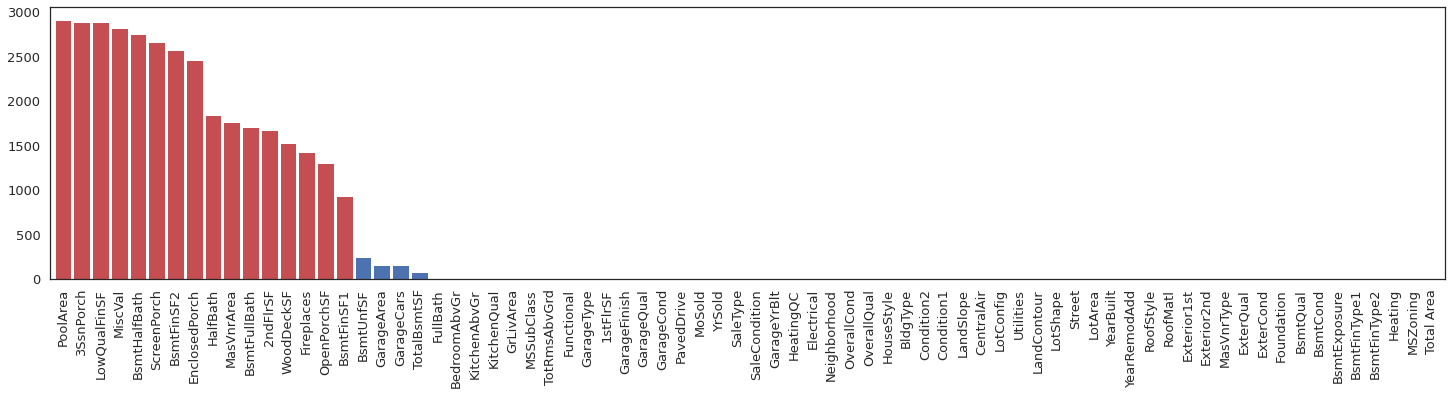

In [26]:
#visualize zero values 
color = ['b' if s <= 500 else 'r' for s in zero_value]
zero_value.plot(kind = 'bar' , fontsize = 13 , width=0.9 , color = color , figsize=(25 , 5))
zero_value.shape

In [27]:
zeros = ['BsmtUnfSF' , 'GarageArea']
for i in zeros: 
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0])

# Covert categorical data

In [28]:
all_data = pd.get_dummies(all_data)

# Make Prediction

In [29]:
y_train = df_train['SalePrice']
X_train = all_data[:len(y_train)]
X_test = all_data[len(y_train):]

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train, y_train)
GBoost.score(X_train , y_train)

0.9668407282691742

In [30]:
y_pred = GBoost.predict(X_test)
y_pred

array([122856.49680361, 159181.04305312, 196153.11282794, ...,
       158307.57532138, 118753.94973146, 214073.87223148])

In [31]:
sub = pd.DataFrame()
sub['Id'] = test_id
sub['SalePrice'] = y_pred
sub.to_csv('E:\\Mysubmission.csv',index=False)

In [32]:
sub.head()

,Id,SalePrice
0,1461,122856.496804
1,1462,159181.043053
2,1463,196153.112828
3,1464,192316.531419
4,1465,188339.715424
